Dense DAISY feature description

Saving 11_amplitude.jpg to 11_amplitude.jpg


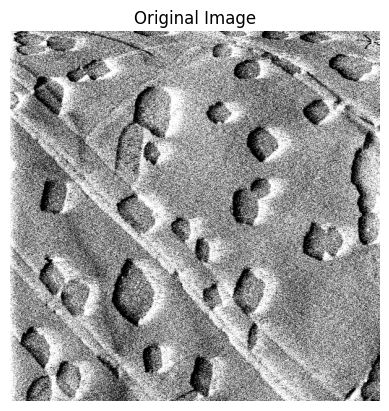

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

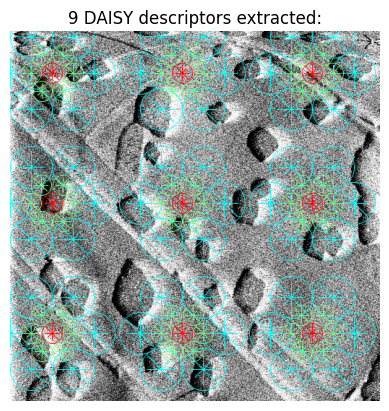

In [ ]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt

descs, descs_img = daisy(
    img, step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True
)

fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title(f"{descs_num} DAISY descriptors extracted:")
plt.show()

Histogram of Oriented Gradients

Saving 11_phase.jpg to 11_phase.jpg


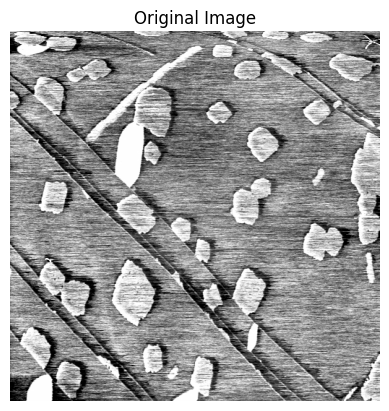

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

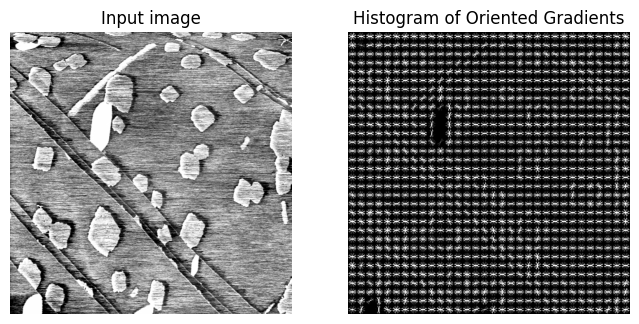

In [ ]:
from skimage.feature import hog
from skimage import data, exposure

if image.ndim == 3:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Corner detection

Saving 11_amplitude.jpg to 11_amplitude (1).jpg


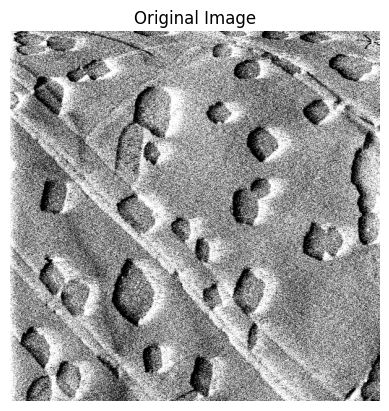

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris, corner_subpix, corner_peaks

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

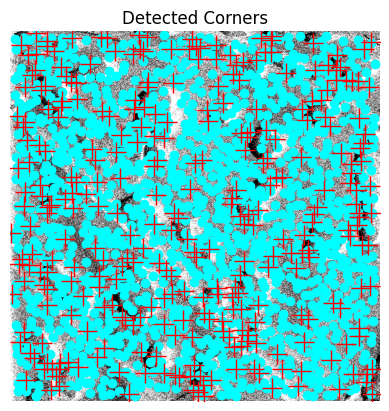

In [ ]:
# Detect corners using corner_harris
coords = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)

# Refine corner locations using corner_subpix
coords_subpix = corner_subpix(image, coords, window_size=13)

# Plot the results
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis('off')
plt.title('Detected Corners')
plt.show()

Filling holes and finding peaks

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import reconstruction
from skimage.exposure import rescale_intensity

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Rescale image intensity so that we can see dim features
image = rescale_intensity(image, in_range=(50, 200))

Saving 11_amplitude.jpg to 11_amplitude (3).jpg


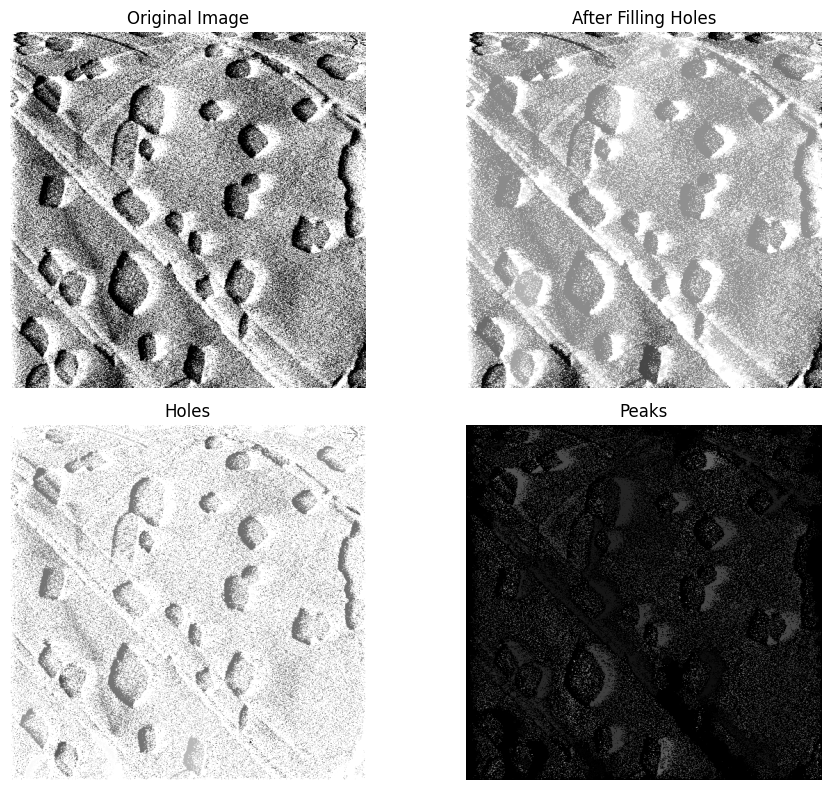

In [ ]:
# Create the seed image for filling holes
seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image
filled = reconstruction(seed, mask, method='erosion')

# Isolate the dark regions (holes)
dark_regions = image - filled

# Create the seed image for finding peaks
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
rec = reconstruction(seed, mask, method='dilation')

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filled, cmap='gray')
ax[1].set_title('After Filling Holes')
ax[1].axis('off')

ax[2].imshow(dark_regions, cmap='gray')
ax[2].set_title('Holes')
ax[2].axis('off')

ax[3].imshow(image - rec, cmap='gray')
ax[3].set_title('Peaks')
ax[3].axis('off')

plt.tight_layout()
plt.show()

Blob Detection

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from math import sqrt

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Saving 11_amplitude.jpg to 11_amplitude (4).jpg


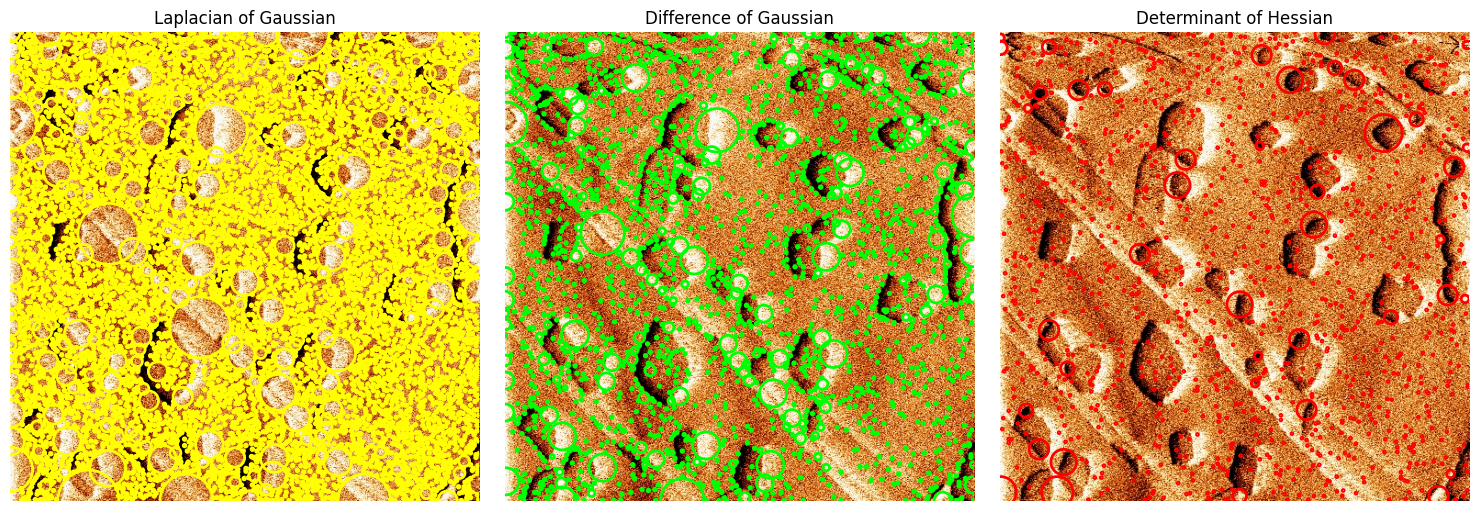

In [ ]:
# Blob detection using Laplacian of Gaussian (LoG)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

# Blob detection using Difference of Gaussian (DoG)
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

# Blob detection using Determinant of Hessian (DoH)
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=0.01)

# Prepare for plotting
blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

Shape Index

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import shape_index
from google.colab import files
import cv2

# Upload the image
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Saving 11_amplitude.jpg to 11_amplitude (6).jpg


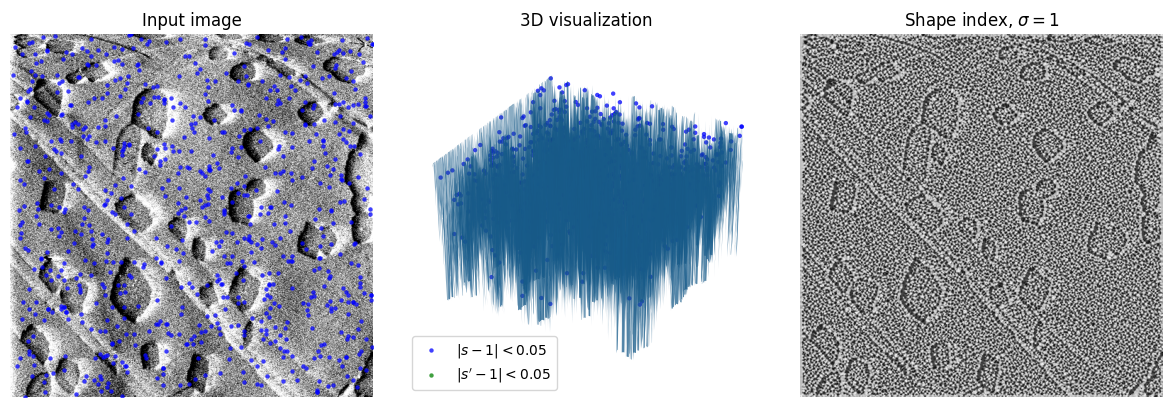

In [ ]:
# Normalize the image
image = image / 255.0

# Compute the shape index
s = shape_index(image)

# Detect 'spherical caps' (shape index close to 1)
target = 1
delta = 0.05

# Find points where shape index is close to the target
point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = image[point_y, point_x]

# Smooth the shape index to reduce noise
s_smooth = ndi.gaussian_filter(s, sigma=0.5)

# Find points where smoothed shape index is close to the target
point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = image[point_y_s, point_x_s]

# Plot the results
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 3, 1)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Input image')

scatter_settings = dict(alpha=0.75, s=10, linewidths=0)
ax1.scatter(point_x, point_y, color='blue', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='green', **scatter_settings)

ax2 = fig.add_subplot(1, 3, 2, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, image.shape[0], 1), np.arange(0, image.shape[1], 1))
ax2.plot_surface(x, y, image, linewidth=0, alpha=0.5)
ax2.scatter(point_x, point_y, point_z, color='blue', label='$|s - 1|<0.05$', **scatter_settings)
ax2.scatter(point_x_s, point_y_s, point_z_s, color='green', label='$|s\' - 1|<0.05$', **scatter_settings)
ax2.legend(loc='lower left')
ax2.axis('off')
ax2.set_title('3D visualization')

ax3 = fig.add_subplot(1, 3, 3, sharex=ax1, sharey=ax1)
ax3.imshow(s, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Shape index, $\sigma=1$')

fig.tight_layout()
plt.show()